---
title: "Backpropagation (역전파)"
author: "박성일"
date: "2024-09-23"
description: "퍼셉트론의 가중치 업데이트 방법"
image: "data/DL.jpg"
format: 
  html:
    toc: true
---

<img src="data/backpropagation.png" style="display:block; margin:auto;">

# Backpropagation (역전파)

**Backpropagation**은 **Artificial Neural Network**를 학습시키기 위한 일반적인 알고리즘 중 하나이다.
한국말로 직역하면 **역전파**라는 뜻인데,<br>
target값과 실제 모델이 계산한 output이 얼마나 차이가 나는지 구한 후,<br> 그 오차값을 다시 뒤로 전파해가면서 각 뉴런이 가지고 있는 변수들을 갱신하는 알고리즘이다.

<hr>

**체인룰(chain rule)** 은 미적분학에서 사용되는 중요한 개념 중 하나로, 함수의 미분을 연쇄적으로 계산할 때 도움을 주는 규칙이다.<br>딥러닝에서도 **backpropagation (역전파)** 알고리즘을 이해하고 구현하는 데 필수적인 개념 중 하나이다.

**체인룰**은 다음과 같이 표현된다. 두 개의 함수 `f(x)`와 `g(x)`가 있을 때, `f(g(x))`의 도함수(미분)를 계산할 때 사용된다.

`(d/dx)[f(g(x))] = (df/dg) * (dg/dx)`

여기서 각 항목의 의미는 다음과 같다:

 - `(d/dx)`는 x에 대한 미분을 의미합니다.
 - `f(g(x))`는 함수 f를 함수 g의 출력에 적용한 것을 나타냅니다.
 - `(df/dg)`는 함수 f를 함수 g의 출력에 대해서 미분한 것을 나타냅니다.
 - `(dg/dx)`는 함수 g를 x에 대해서 미분한 것을 나타냅니다.


이 규칙을 사용하여 복잡한 함수를 구성하는 동안 각 함수의 미분 값을 계산하고, 그 값을 이용하여 전체 함수의 미분을 계산할 수 있다.<br>이러한 체인룰은 신경망에서 각 층의 미분을 효과적으로 계산하는 데 사용되며, 역전파 알고리즘의 핵심 구성 요소 중 하나이다.<br>딥러닝에서는 체인룰을 통해 모델을 훈련시키고, 가중치 및 편향을 업데이트하는 데 사용된다.


# 예시 1

### 모델 구조

1-레이어, 1퍼셉트론이고 input 변수가 2개인 신경망을 사용해서 backpropagation 구현

#### Backward Pass

$$
\frac{\partial L}{\partial a_1} = (a_1 - y)
$$
$$
\frac{\partial L}{\partial z_1} = \frac{\partial L}{\partial a_1} \times \sigma'(a_1)
$$
$$
\frac{\partial L}{\partial W_1} = X^T \frac{\partial L}{\partial z_1}
$$
$$
\frac{\partial L}{\partial b_1} = \sum \frac{\partial L}{\partial z_1}
$$

#### Weight Update:

$$
W_1 = W_1 - \text{learning\_rate} \times \frac{\partial L}{\partial W_1}
$$
$$
b_1 = b_1 - \text{learning\_rate} \times \frac{\partial L}{\partial b_1}
$$

#### Visualization

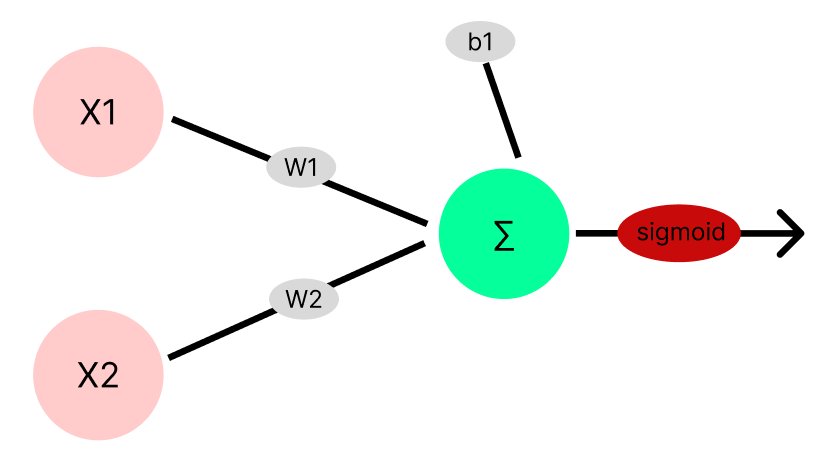

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# 시그모이드
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 시그모이드 도함수
def sigmoid_derivative(x):
    return x * (1 - x)

# 손실함수
def mse_loss(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)

# 예시 데이터 (XOR)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0]).reshape(-1,1)

|x1|x2|y|
|---|---|---|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [2]:
input_size = 2
output_size = 1

learning_rate = 0.1
epochs = 500
loss_log = []


W1 = np.random.randn(input_size, output_size)
b1 = np.zeros(1)

for epoch in range(epochs):
    # Forward Pass
    z1 = np.dot(X,W1) + b1
    a1 = sigmoid(z1)

    # Loss
    loss = mse_loss(y,a1)
    loss_log.append(loss)

    # Backward Pass
    da1 = a1-y
    dz1 = da1 * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1)
    db1 = sum(dW1)

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1


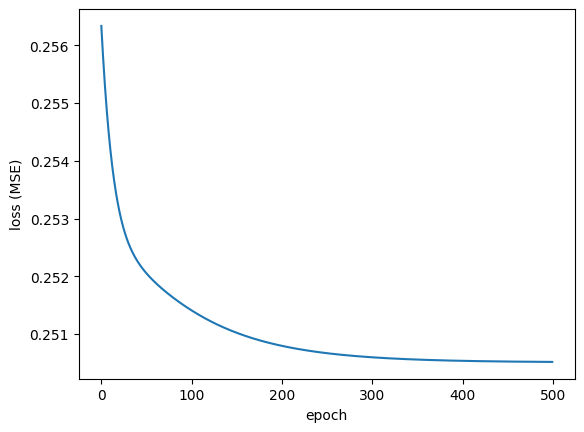

In [3]:
plt.plot(loss_log)
plt.xlabel("epoch")
plt.ylabel('loss (MSE)')
plt.show()

#### 0.5로 수렴

In [4]:
for i in range(len(a1)):
    print(f"true : {y[i]}, pred : {a1[i]}")    

true : [0], pred : [0.46165457]
true : [1], pred : [0.48309155]
true : [1], pred : [0.49126563]
true : [0], pred : [0.51276794]


# 예시 2

### 모델 구조

1-레이어, 3-퍼셉트론

#### Visualization

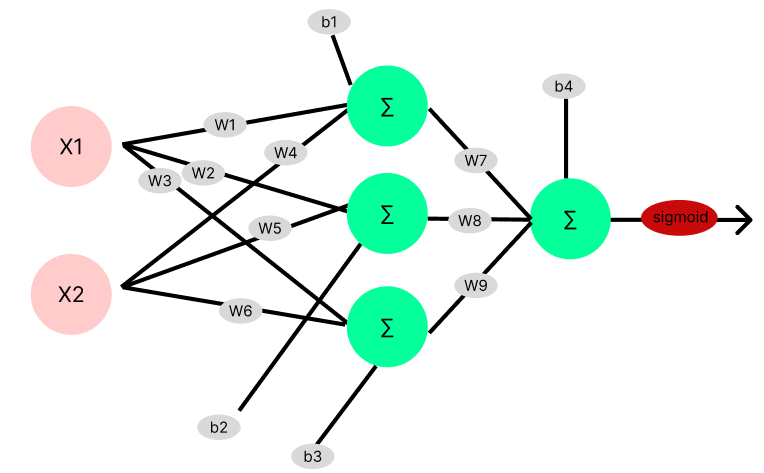

In [5]:
input_size = 2
hidden_size = 3
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

learning_rate = 0.1
epochs = 10000
loss_log = []

for epoch in range(epochs):
    # Forward Pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss
    loss = np.mean((y - a2) ** 2)

    # Backward Pass
    da2 = (a2 - y)
    dz2 = da2 * sigmoid_derivative(a2)
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # 가중치 업데이트
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # 일정 에포크마다 손실 출력
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")
    loss_log.append(loss)

Epoch 0/10000, Loss: 0.2440
Epoch 1000/10000, Loss: 0.1881
Epoch 2000/10000, Loss: 0.0920
Epoch 3000/10000, Loss: 0.0313
Epoch 4000/10000, Loss: 0.0149
Epoch 5000/10000, Loss: 0.0092
Epoch 6000/10000, Loss: 0.0065
Epoch 7000/10000, Loss: 0.0049
Epoch 8000/10000, Loss: 0.0040
Epoch 9000/10000, Loss: 0.0033


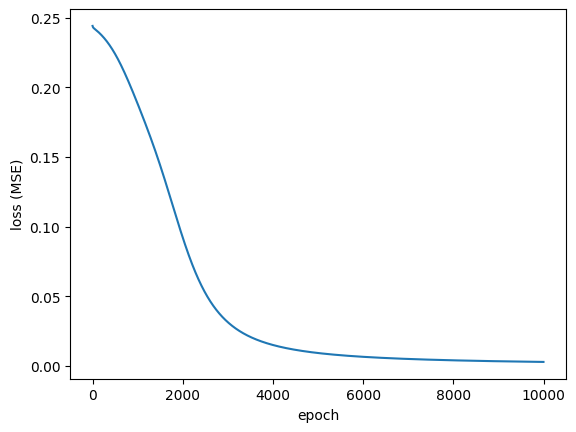

In [6]:
plt.plot(loss_log)
plt.xlabel("epoch")
plt.ylabel("loss (MSE)")
plt.show()

#### 1-퍼셉트론 모델보다 좋은 성능을 보인다.

In [7]:
for i in range(len(a2)):
    print(f"true : {y[i]}, pred : {a2[i]}")    

true : [0], pred : [0.02224667]
true : [1], pred : [0.94486905]
true : [1], pred : [0.94514992]
true : [0], pred : [0.06836053]
